In [24]:
from funcoes_arima import read_data
from funcoes_arima import arima_model_plot
from funcoes_arima import sarima_model_plot
from funcoes_arima import autoArima
from funcoes_arima import plot_diffs
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

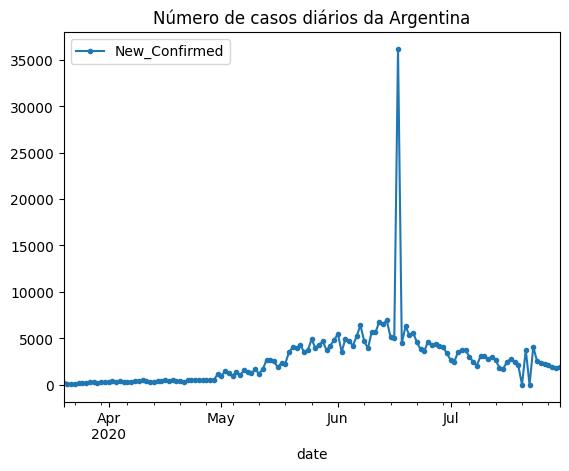

In [5]:
reg_data_ch = read_data('CH')
reg_data_ch = reg_data_ch.loc[reg_data_ch.ge(100).idxmax()[0]:]
reg_data_ch.plot(marker='.')
plt.title('Número de casos diários da Argentina');

In [30]:
anomaly = reg_data_ch.query('New_Confirmed > 35_000').index
previous_dates = [anomaly.values[:][0] - np.timedelta64(i, 'D') for i in range(1, 8)]
previous_values = reg_data_ch.loc[previous_dates]
mean_previous = previous_values.mean()
reg_data_ch.loc[anomaly] = mean_previous
reg_data_ch.fillna(mean_previous, inplace=True)

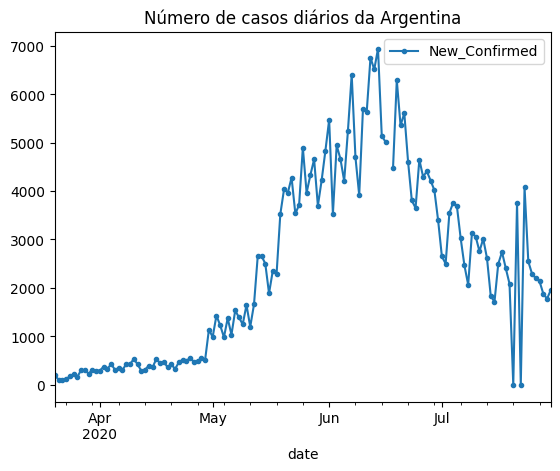

In [31]:
reg_data_ch.plot(marker='.')
plt.title('Número de casos diários da Argentina');

In [62]:
anomaly = reg_data_ch.loc[pd.isna(reg_data_ch["New_Confirmed"]), :].index
previous_dates = [anomaly.values[:][0] - np.timedelta64(i, 'D') for i in range(1, 8)]
previous_values = reg_data_ch.loc[previous_dates]
mean_previous = previous_values.mean()
reg_data_ch.loc[anomaly] = mean_previous

In [68]:
reg_data_ch.fillna(mean_previous, inplace=True)
reg_data_ch.loc[anomaly]

,New_Confirmed
date,
2020-06-17,5955.714286


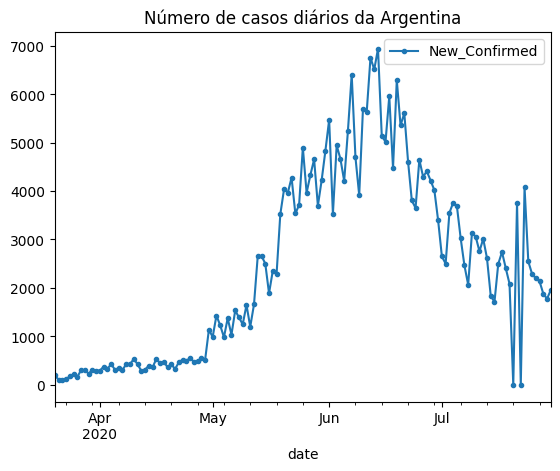

In [69]:
reg_data_ch.plot(marker='.')
plt.title('Número de casos diários da Argentina');

In [70]:
print('Total de registros:', len(reg_data_ch))
print('Número de registros para treino:', round(len(reg_data_ch)*0.7, 0))
print('Número de registros para teste:', round(len(reg_data_ch)*0.3, 0))

Total de registros: 133
Número de registros para treino: 93.0
Número de registros para teste: 40.0


In [71]:
train_data = reg_data_ch.iloc[:93]
test_data = reg_data_ch.iloc[93:]
print('Número de registros para treino final:', len(train_data))
print('Número de registros para teste final:', len(test_data))

Número de registros para treino final: 93
Número de registros para teste final: 40


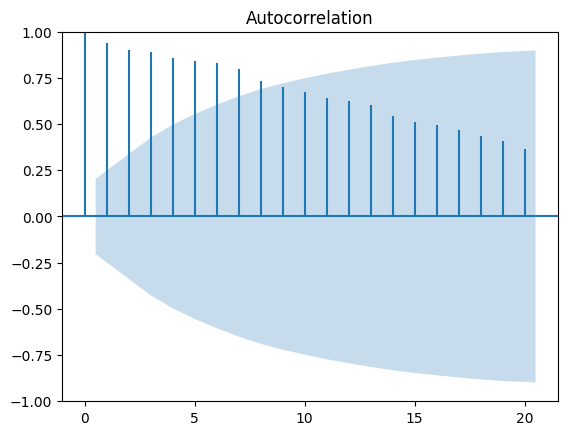

In [72]:
plot_acf(train_data['New_Confirmed'],  marker='');

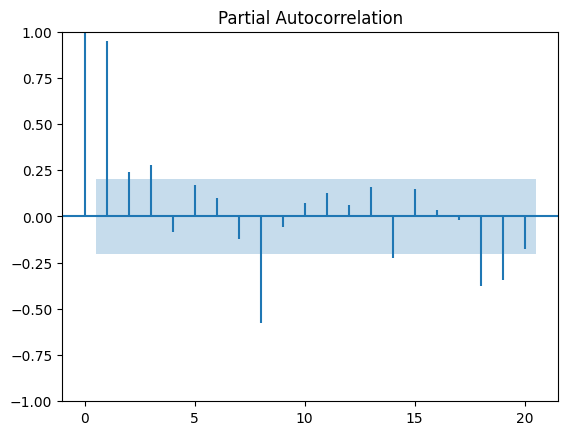

In [73]:
plot_pacf(train_data['New_Confirmed'],  marker='');

ADF Statistic 0 Order: -0.536928
p-value: 0.884606
ADF Statistic 1st Order: -2.602177
p-value: 0.092548
ADF Statistic 2nd Order: -13.988254
p-value: 0.000000
ADF Statistic 3th order: -6.213770
p-value: 0.000000


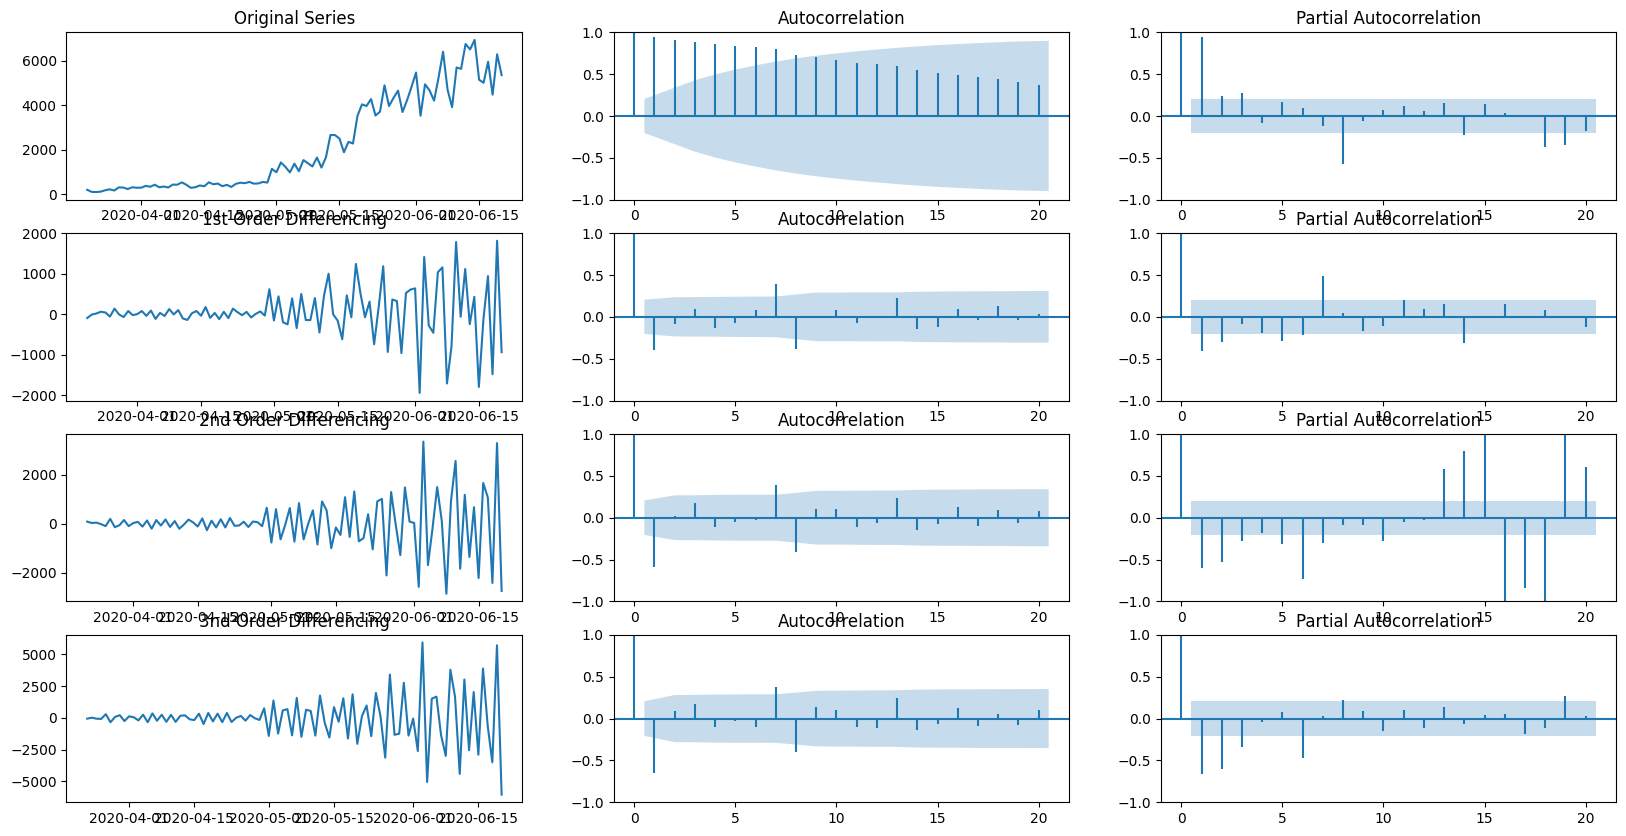

In [74]:
plot_diffs(train_data)

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   93
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -723.492
Date:                Thu, 19 Jan 2023   AIC                           1456.984
Time:                        22:30:29   BIC                           1469.647
Sample:                    03-20-2020   HQIC                          1462.097
                         - 06-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2218.3133   3311.487      0.670      0.503   -4272.082    8708.708
ar.L1          0.5084      0.069      7.343      0.000       0.373       0.644
ar.L2          0.2096      0.083      2.518      0.0

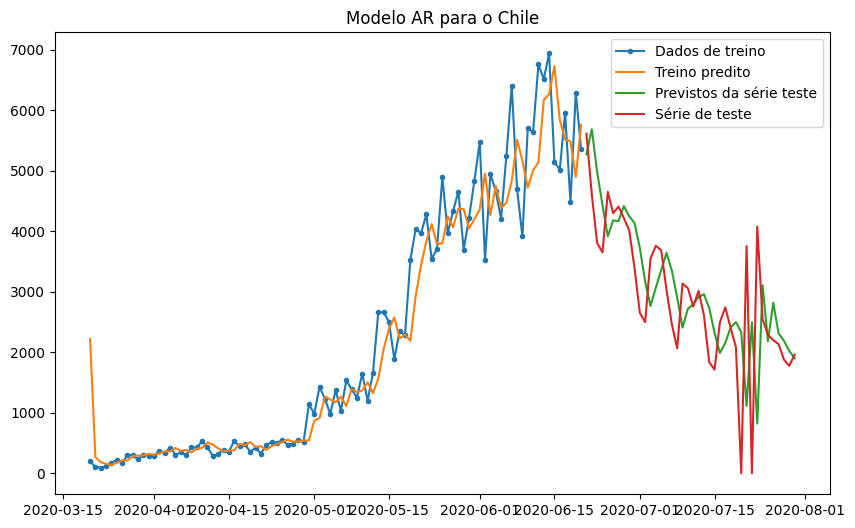

In [78]:
arima_model_plot(train_data, test_data, p=3, model_name='AR', country='Chile')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   93
Model:                 ARIMA(0, 0, 8)   Log Likelihood                -727.802
Date:                Thu, 19 Jan 2023   AIC                           1475.604
Time:                        22:30:42   BIC                           1500.930
Sample:                    03-20-2020   HQIC                          1485.830
                         - 06-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2219.3017    520.303      4.265      0.000    1199.527    3239.076
ma.L1          0.8873    381.836      0.002      0.998    -747.498     749.272
ma.L2          0.7976    324.711      0.002      0.9

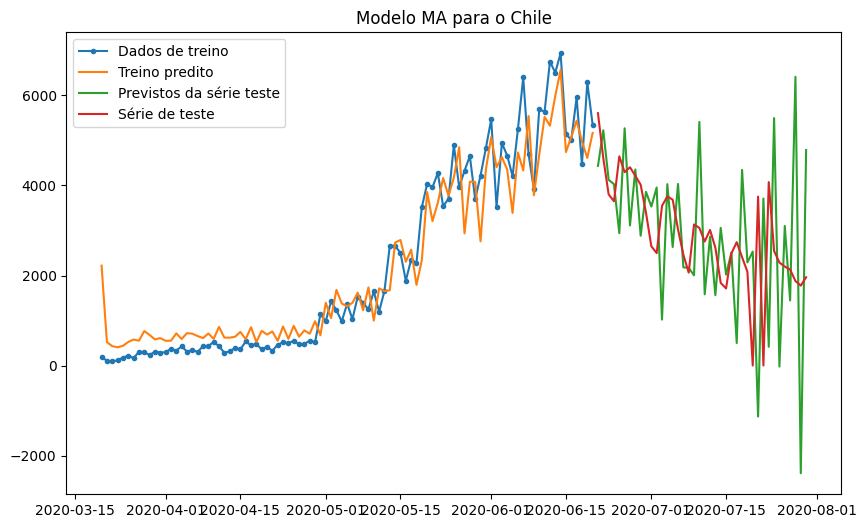

In [79]:
arima_model_plot(train_data, test_data, q=8, model_name='MA', country='Chile')

                               SARIMAX Results                                
Dep. Variable:          New_Confirmed   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -713.878
Date:                Thu, 19 Jan 2023   AIC                           1433.756
Time:                        22:33:30   BIC                           1441.321
Sample:                    03-20-2020   HQIC                          1436.809
                         - 06-20-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0344      0.144      0.238      0.812      -0.249       0.317
ma.L1         -0.5636      0.123     -4.575      0.000      -0.805      -0.322
sigma2      3.209e+05   3.87e+04      8.295      0.0

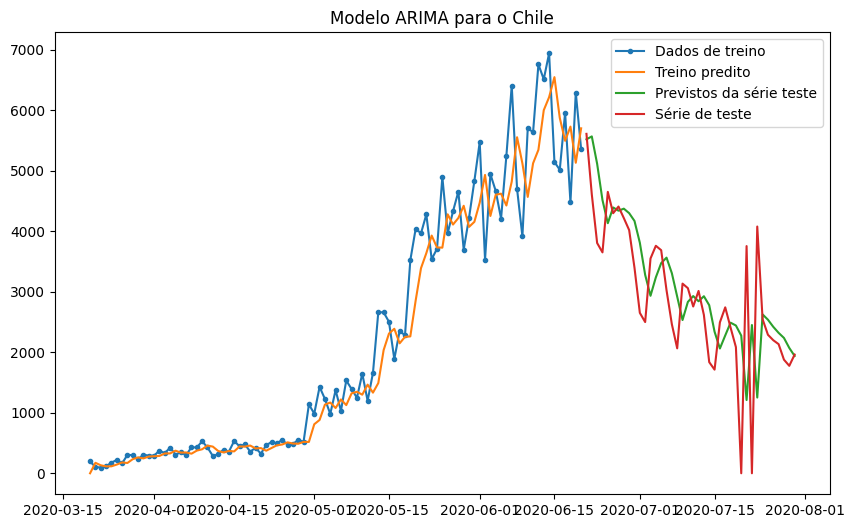

In [90]:
arima_model_plot(train_data, test_data, p=1, d=1, q=1, model_name='ARIMA', country='Chile')

In [85]:
autoArima(train_data)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

                                     SARIMAX Results                                     
Dep. Variable:                     New_Confirmed   No. Observations:                   93
Model:             ARIMA(1, 1, 3)x(1, 1, [1], 7)   Log Likelihood                -655.047
Date:                           Thu, 19 Jan 2023   AIC                           1324.095
Time:                                   22:34:56   BIC                           1341.193
Sample:                               03-20-2020   HQIC                          1330.972
                                    - 06-20-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.959      1.042      0.297      -0.880       2.879
ma.L1         -1.5446      3.696     -0.418

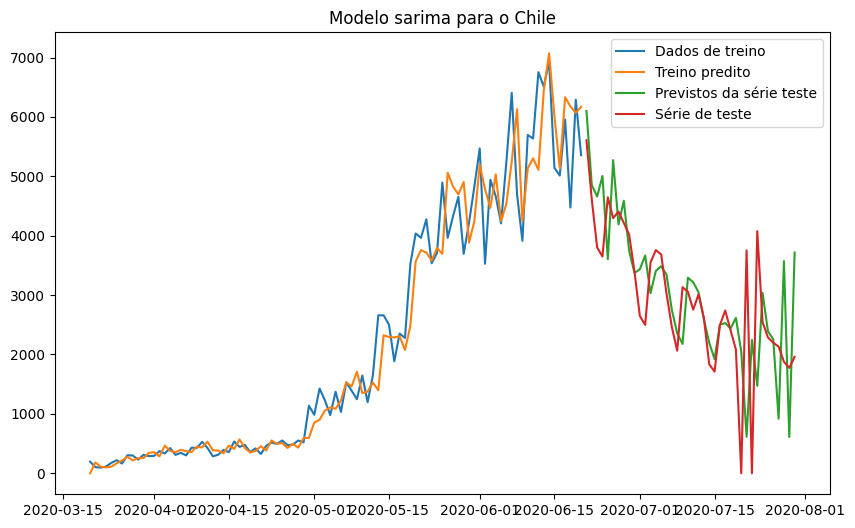

In [94]:
sarima_model_plot(train_data, test_data, p=1, d=1, q=3, P=1, D=1, Q=1, m=7, country='Chile', model_name='sarima')